In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\91999\downloads')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
wine = pd.read_csv("winequality-red.csv")

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine.shape

(1599, 12)

In [10]:
wine.duplicated().sum()
# there are 240 duplicate values which need to be dropped

240

In [11]:
# dropping the duplicate values.
wine.drop_duplicates(inplace=True)

In [12]:
# checking for NaN values.
wine.isna().sum()
#There is no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


#### All the variables are numerical except the dependent variable which is the quality of wine

In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

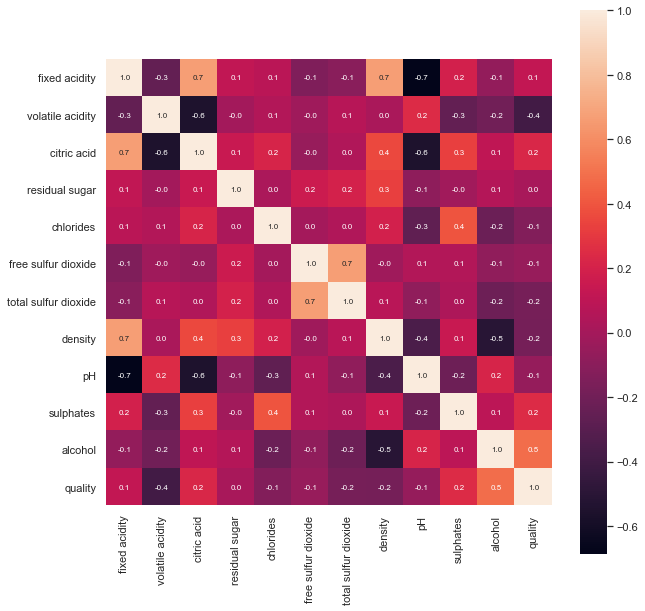

In [42]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = None)

#### We can see that quality of wine doesn't have a very strong correlation with any of the given variables.

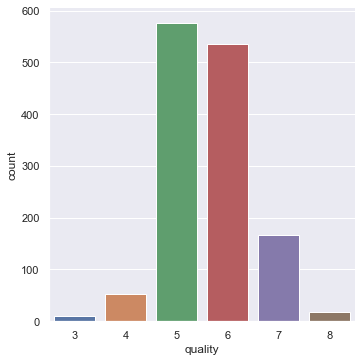

In [43]:
# number of values for each quality
sns.catplot(x='quality', data = wine, kind = 'count')

#### Maximum data is of quality 5 followed by quality 6

In [44]:
wine.corr()[['quality']].sort_values(by='quality', ascending = False)

# alcohol, density, volatile acidity, chlorides influence the quality of wine in the order. 

,quality
quality,1.000000
alcohol,0.480343
sulphates,0.248835
citric acid,0.228057
fixed acidity,0.119024
residual sugar,0.013640
free sulfur dioxide,-0.050463
pH,-0.055245
chlorides,-0.130988
total sulfur dioxide,-0.177855


### quality vs volatile acidity

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

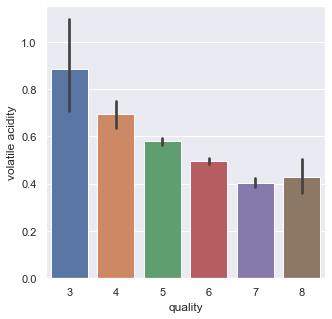

In [45]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)

#### It depicts that if volatile acidity will be less in the wine, the quality of the wine will be more. Let's confirm this by looking at the average value of volatile acidity at each quality level

In [46]:
wine.groupby('quality')['volatile acidity'].mean()

quality
3    0.884500
4    0.693962
5    0.578596
6    0.496084
7    0.403653
8    0.427647
Name: volatile acidity, dtype: float64

#### Thus, we can say quantity of volatile acidity should be less for good quality wine

### quality vs density

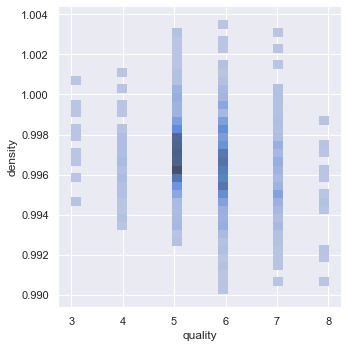

In [47]:
sns.displot(wine, x="quality", y="density")

#### It seems that less the density of the wine, more the quality of wine. 

In [48]:
wine.groupby('quality')['density'].mean()

quality
3    0.997464
4    0.996542
5    0.997082
6    0.996565
7    0.996051
8    0.995095
Name: density, dtype: float64

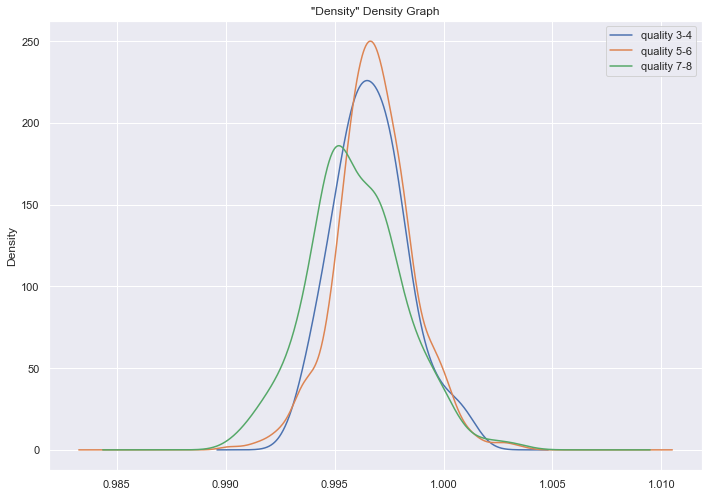

In [54]:
#As we are not getting significant results let's do density plot
wine[(wine["quality"] == 3) | (wine["quality"] == 4)]["density"].plot.kde(label="quality 3-4").set(title='"Density" Density Graph')
wine[(wine["quality"] == 5) | (wine["quality"] == 6)]["density"].plot.kde(label="quality 5-6")
wine[(wine["quality"] == 7) | (wine["quality"] == 8)]["density"].plot.kde(label="quality 7-8")
plt.legend()

#### Thus, Decrease in the density of the wine, increases the quality of the wine.

### quality vs alcohol

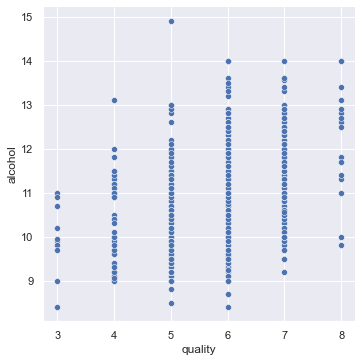

In [55]:
sns.relplot(x = "quality", y = "alcohol", data = wine)

#### It looks like good amount of alcohol contributes to the quality of the red wine

In [56]:
wine.groupby('quality')['alcohol'].mean()

quality
3     9.955000
4    10.265094
5     9.888562
6    10.658879
7    11.491118
8    12.158824
Name: alcohol, dtype: float64

#### Increase in the alcohol qty, increases the quality of the wine.

### quality vs sulphates

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

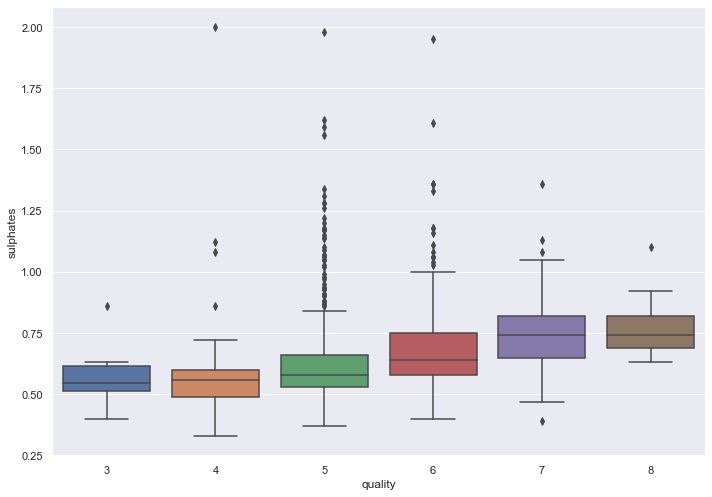

In [57]:
sns.boxplot(x = "quality", y = "sulphates", data = wine)

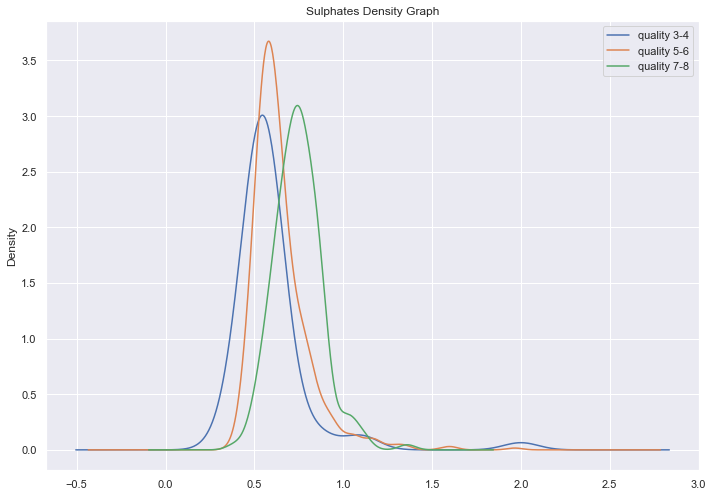

In [58]:
wine[(wine["quality"] == 3) | (wine["quality"] == 4)]["sulphates"].plot.kde(label="quality 3-4").set(title='Sulphates Density Graph')
wine[(wine["quality"] == 5) | (wine["quality"] == 6)]["sulphates"].plot.kde(label="quality 5-6")
wine[(wine["quality"] == 7) | (wine["quality"] == 8)]["sulphates"].plot.kde(label="quality 7-8")
plt.legend()

#### Cannot say much about the impact of sulphates on the quality

### quality vs chlorides

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

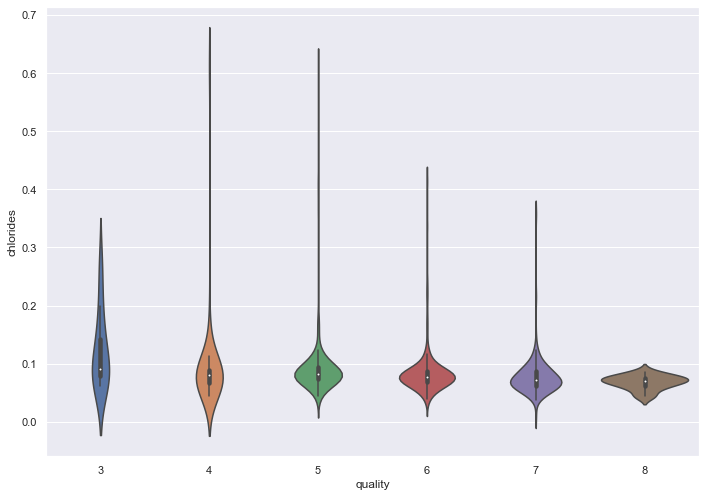

In [60]:
sns.violinplot(x ="quality", y = "chlorides", data = wine)

#### It's clear that chlorides and quality of wine has a negative correlation

###  density vs alcohol

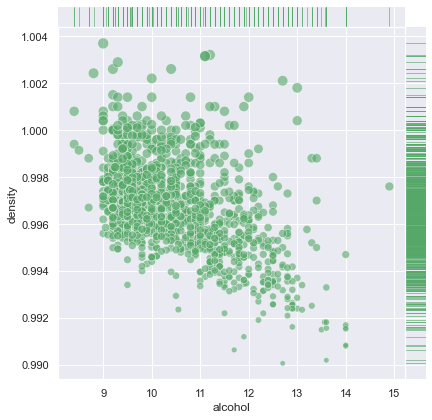

In [66]:
g = sns.JointGrid(data=wine, x="alcohol", y="density", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=wine["density"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

###  density vs alcohol with quality

#### If we increase the amount of alcohol in the wine the density will decrease

C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<AxesSubplot:xlabel='alcohol', ylabel='density'>

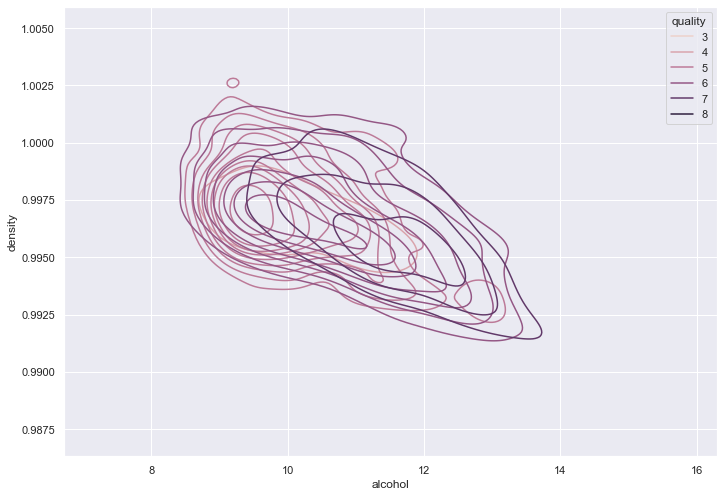

In [73]:
sns.kdeplot(
    data=wine,
    x="alcohol",
    y="density",
    hue="quality",
    thresh=.1,
)

#### As the KDE plot of quality 8 shows high alcohol and low density, we can conclude Increase in the alcohol qty leads to decrease in the density of the wine and further increases the quality of the wine.

###  volatile acidity vs chlorides with quality

<AxesSubplot:xlabel='chlorides', ylabel='volatile acidity'>

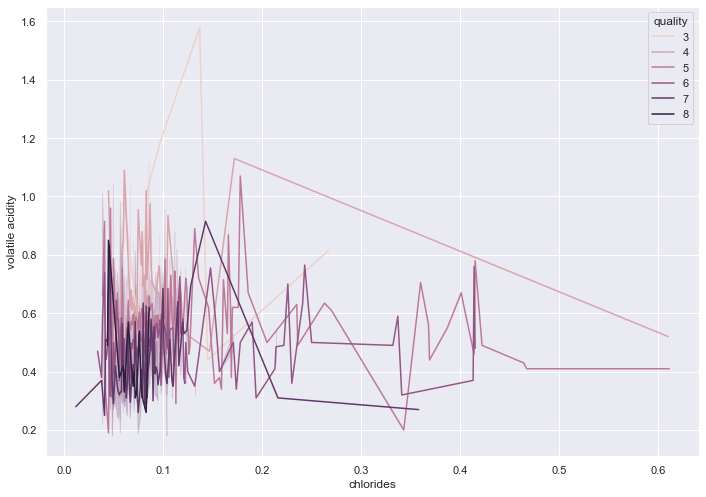

In [74]:
sns.lineplot(x="chlorides", y="volatile acidity",
             hue="quality",
             data=wine)

#### Lower the value of volatile acidity and chlorides more will be the quality of wine.

# Regression Model

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

In [79]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [81]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [82]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [83]:
model_wine = wine[['quality','alcohol']]

In [84]:
model_wine

,quality,alcohol
0,5,9.4
1,5,9.8
2,5,9.8
3,6,9.8
5,5,9.4
...,...,...
1593,6,9.5
1594,5,10.5
1595,6,11.2
1597,5,10.2


In [85]:
x = model_wine.alcohol
y = model_wine.quality

In [86]:
model = LinearRegression()

In [87]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [93]:
intercept_ = model.intercept_ #b0
print('intercept:', intercept_)

intercept: 1.80922953651288


#### When value of alcohol is zero the quality of wine is 1.809

In [94]:
model.coef_ = model.coef_ #b1
print('slope:', model.coef_)

slope: [0.36559696]


#### When we will increase the value of alcohol by 1 the quality is increased by 0.366

In [92]:
r_sq = model.score(np.array(x).reshape(-1,1),y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.23072929966053068


#### The accuracy of this linear regression model is just 23%

### Multiple Linear regression

In [6]:
X = wine[['volatile acidity', 'chlorides', 'density','sulphates', 'alcohol', 'quality']]
y = wine['quality']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [103]:
model = LinearRegression()

In [104]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
intercept_ = model.intercept_ #b0
print('intercept:', intercept_)

intercept: -7.993605777301127e-14


In [106]:
model.coef_ = model.coef_ #b1
print('slope:', model.coef_)

slope: [ 1.46705624e-15 -7.49326027e-16  7.61759735e-14 -4.51895505e-16
 -2.25131488e-16  1.00000000e+00]


In [107]:
model.score(X_train, y_train)

1.0

In [108]:
model.predict(X_test)

array([5., 5., 6., 5., 5., 5., 6., 7., 4., 6., 5., 6., 5., 7., 6., 6., 6.,
       6., 6., 6., 6., 5., 4., 6., 6., 5., 7., 5., 6., 7., 6., 6., 5., 5.,
       5., 5., 4., 6., 6., 6., 6., 5., 6., 6., 4., 5., 5., 5., 7., 6., 5.,
       5., 5., 5., 5., 6., 6., 4., 7., 6., 4., 6., 5., 6., 5., 5., 5., 6.,
       5., 5., 6., 7., 6., 7., 5., 7., 6., 5., 5., 5., 5., 5., 5., 6., 7.,
       5., 3., 6., 6., 5., 6., 7., 6., 7., 5., 5., 5., 5., 6., 7., 6., 5.,
       5., 5., 4., 5., 5., 6., 5., 5., 6., 5., 6., 6., 5., 5., 5., 5., 5.,
       6., 6., 4., 6., 5., 7., 4., 7., 5., 7., 5., 6., 5., 5., 5., 5., 5.,
       5., 6., 5., 6., 5., 5., 7., 5., 6., 6., 6., 4., 5., 6., 7., 6., 6.,
       6., 7., 5., 6., 7., 6., 6., 5., 5., 6., 5., 6., 4., 5., 6., 6., 5.,
       4., 6., 7., 4., 5., 6., 6., 5., 6., 5., 6., 5., 5., 5., 5., 5., 6.,
       6., 5., 7., 7., 6., 6., 5., 5., 5., 6., 5., 6., 6., 6., 6., 5., 6.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 5., 6., 5., 7., 6., 6.,
       5., 6., 7., 6., 4.

In [109]:
y_test.values

array([5, 5, 6, 5, 5, 5, 6, 7, 4, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 5,
       4, 6, 6, 5, 7, 5, 6, 7, 6, 6, 5, 5, 5, 5, 4, 6, 6, 6, 6, 5, 6, 6,
       4, 5, 5, 5, 7, 6, 5, 5, 5, 5, 5, 6, 6, 4, 7, 6, 4, 6, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 7, 6, 7, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 7, 5, 3, 6,
       6, 5, 6, 7, 6, 7, 5, 5, 5, 5, 6, 7, 6, 5, 5, 5, 4, 5, 5, 6, 5, 5,
       6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 4, 6, 5, 7, 4, 7, 5, 7, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 6, 6, 6, 4, 5, 6, 7, 6, 6, 6,
       7, 5, 6, 7, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 4, 6, 7, 4, 5, 6,
       6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 7, 7, 6, 6, 5, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 7, 6,
       6, 5, 6, 7, 6, 4, 6, 6, 5, 7, 5, 5, 6, 6, 5, 7, 5, 6, 5, 5, 5, 5,
       6, 5, 4, 7, 6, 6, 5, 6, 5, 6, 6, 6, 7, 5, 6, 5, 6, 7, 5, 6, 6, 5,
       5, 6, 6, 4, 5, 5, 5, 4], dtype=int64)

In [110]:
model.score(X_train, y_train)

1.0

## Q3) Bonus: Do the above step using statsmodels package. What is the difference?

In [8]:
import numpy as np

import statsmodels.api as sm


results = sm.OLS(y, X).fit()

# Inspect the results
In [16]: print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.139e+31
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                        0.00
Time:                        11:43:53   Log-Likelihood:                          49127.
No. Observations:                1599   AIC:                                 -9.824e+04
Df Residuals:                    1593   BIC:                                 -9.821e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### A key difference between the two libraries is how they handle constants. Scikit-learn allows the user to specify whether or not to add a constant through a parameter, while statsmodels’ OLS class has a function that adds a constant to a given array.